<a href="https://colab.research.google.com/github/marreapato/ML_Project_Taxi_Trip_Duration/blob/main/Projeto_Lucas_Rabelo_AM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/machine-learning

!ls




/content/gdrive/MyDrive/machine-learning
Failing_Equipment_Exercise.xlsx  test.csv  train.csv


# Extração e Leitura dos Dados

In [3]:
# For visualizations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


# Análise Inicial

Alguns arrendodamentos foram feitos na análise, utilizando a regra geral de arredondamento para elhor interpretabilidade dos resultados.

No conjunto de treinamento há uma média de aproximadente 2 passageiros por viagem, sendo que até 50% das viagens contém apenas um passageiro, além disso a duração média das viagens é de 959 segundos (ou de aproximadamente 16 minutos)

In [5]:
train['trip_duration'].mean()/60

15.991537882672764

In [6]:
train.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


No  conjunto de testes a média de passageiros por viagens também foi de aproximadamente 2 passageiros e até 50% das viagens continham apenas um passageiro

In [7]:
test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


Além disso nem no conjunto de teste, nem no conjunto de treinamento há a presença de valores faltantes (missing data)

In [8]:
train.isnull().values.any()

False

In [9]:
test.isnull().values.any()

False

A definição de todas as variáveis está disponível em: https://www.kaggle.com/competitions/nyc-taxi-trip-duration/data

As definições de cada feature basicamente são:

**Esquema Explicativo das Features:**

- **id:** Identificador único da viagem
- **vendor_id:** Código que indica o provedor associado ao registro da viagem
- **pickup_datetime:** Data e hora em que o taxímetro foi acionado
- **dropoff_datetime:** Data e hora em que o taxímetro foi desligado
- **passenger_count:** Número de passageiros no veículo (valor inserido pelo motorista)
- **pickup_longitude:** Longitude onde o taxímetro foi acionado
- **pickup_latitude:** Latitude onde o taxímetro foi acionado
- **dropoff_longitude:** Longitude onde o taxímetro foi desligado
- **dropoff_latitude:** Latitude onde o taxímetro foi desligado
- **store_and_fwd_flag:** Indica se o registro da viagem foi retido na memória do veículo antes de ser enviado ao provedor devido à falta de conexão com o servidor - Y=armazenar e encaminhar; N=não é uma viagem armazenada e encaminhada
- **trip_duration:** Duração da viagem em segundos

Das viagens que foram guardadas na memória do veículo e enviadas ao servidor, store_and_forward = Y, tiveram um tempo médio de viagem maior do que as que não foram guardadas no servidor.

<ipython-input-10-cb52ec132489>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = train.groupby('store_and_fwd_flag').mean()


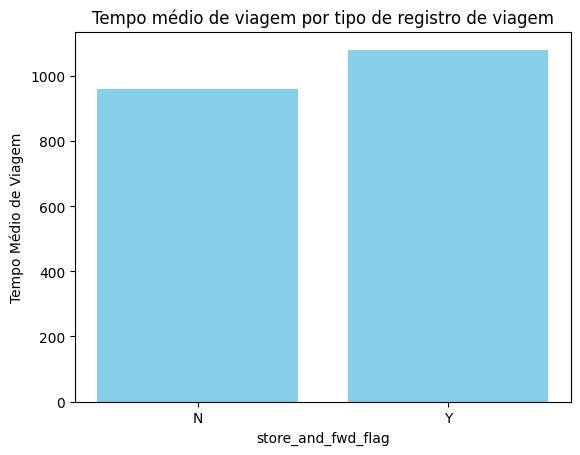

In [10]:
# Group by 'Category' and sum the values
grouped_df = train.groupby('store_and_fwd_flag').mean()
grouped_df
# Resetting the index to make 'store_and_fwd_flag' a regular column
grouped_df = grouped_df.reset_index()

# Creating a bar plot
plt.bar(grouped_df['store_and_fwd_flag'],grouped_df['trip_duration'], color='skyblue')


# Adding labels and title
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Tempo Médio de Viagem')
plt.title('Tempo médio de viagem por tipo de registro de viagem')

# Display the plot
plt.show()

A maioria das viagens não possuía o registro salvo, como mostra o gráfico abaixo:

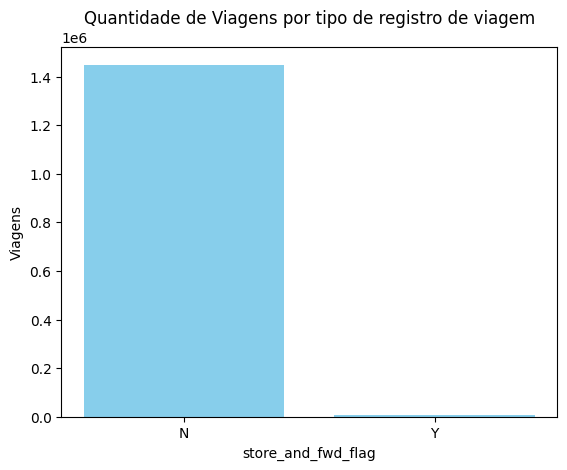

In [11]:
# Group by 'Category' and sum the values
grouped_df = train.groupby('store_and_fwd_flag').size().reset_index(name='counts')
grouped_df

# Resetting the index to make 'store_and_fwd_flag' a regular column
grouped_df = grouped_df.reset_index()

grouped_df

# Creating a bar plot
plt.bar(grouped_df['store_and_fwd_flag'],grouped_df['counts'], color='skyblue')


# Adding labels and title
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Viagens')
plt.title('Quantidade de Viagens por tipo de registro de viagem')

# Display the plot
plt.show()




A maioria das viagens não possuía o registro salvo, também no conjunto de teste, como mostra o gráfico abaixo:

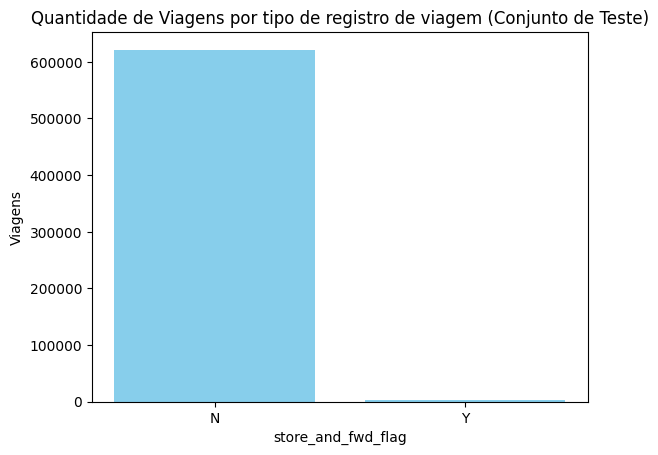

In [12]:
# Group by 'Category' and sum the values
grouped_df = test.groupby('store_and_fwd_flag').size().reset_index(name='counts')
grouped_df

# Resetting the index to make 'store_and_fwd_flag' a regular column
grouped_df = grouped_df.reset_index()

grouped_df

# Creating a bar plot
plt.bar(grouped_df['store_and_fwd_flag'],grouped_df['counts'], color='skyblue')


# Adding labels and title
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Viagens')
plt.title('Quantidade de Viagens por tipo de registro de viagem (Conjunto de Teste)')

# Display the plot
plt.show()




A maioria das viagens possuía apenas um passageiro

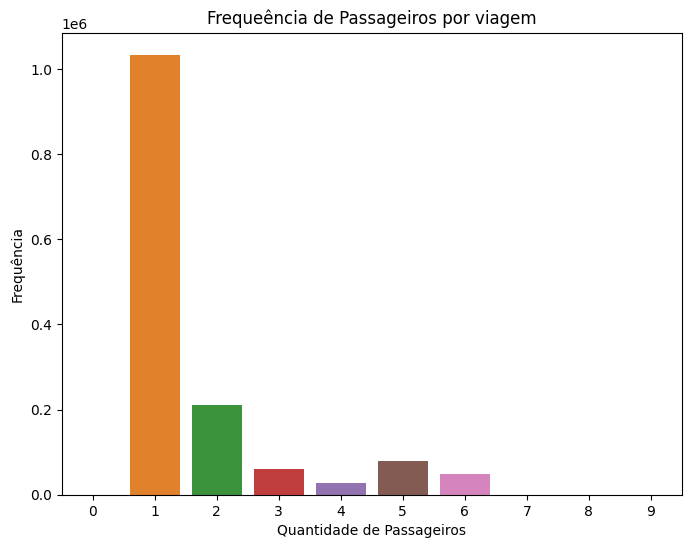

In [13]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='passenger_count', data=train[['passenger_count']])

# Set plot labels and title
plt.xlabel('Quantidade de Passageiros')
plt.ylabel('Frequência')
plt.title('Frequeência de Passageiros por viagem')

# Show the plot
plt.show()

# Pré-Processamento

A formula de Haversine (https://community.esri.com/t5/coordinate-reference-systems-blog/distance-on-a-sphere-the-haversine-formula/ba-p/902128), foi utilizada para capturar a distancia em kilomentros entre a latitude e longitude de origem e a de destino:

In [14]:
!pip install haversine

Com isso temos uma Feature que nos diz a distância entre o destino e a origem

In [15]:
import haversine as hs #https://stackoverflow.com/questions/38623122/finding-the-distance-between-several-points-lat-long

train['start_coord'] = list(zip(train.pickup_latitude, train.pickup_longitude))
train['end_coord'] = list(zip(train.dropoff_latitude, train.dropoff_longitude))

train["Haversine_dist"] = train.apply(lambda x: hs.haversine(x["start_coord"], x["end_coord"]), axis=1)

test['start_coord'] = list(zip(test.pickup_latitude, test.pickup_longitude))
test['end_coord'] = list(zip(test.dropoff_latitude, test.dropoff_longitude))

test["Haversine_dist"] = test.apply(lambda x: hs.haversine(x["start_coord"], x["end_coord"]), axis=1)


train["Haversine_dist"]

0          1.498523
1          1.805510
2          6.385107
3          1.485500
4          1.188590
             ...   
1458639    1.225082
1458640    6.049844
1458641    7.824617
1458642    1.092565
1458643    1.134044
Name: Haversine_dist, Length: 1458644, dtype: float64

Também são adicionadas algumas features que nos trazem os Dias da semana, hora do dia, mês

<ipython-input-16-bbe0ca215620>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_weekday = train.groupby('weekday').mean().reset_index()
<ipython-input-16-bbe0ca215620>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_hour = train.groupby('hour_of_day').mean().reset_index()


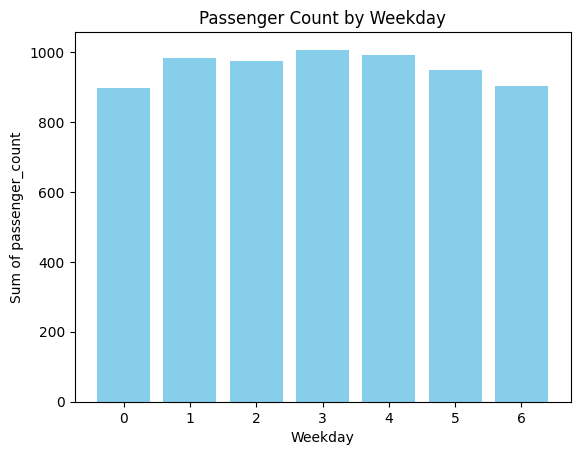

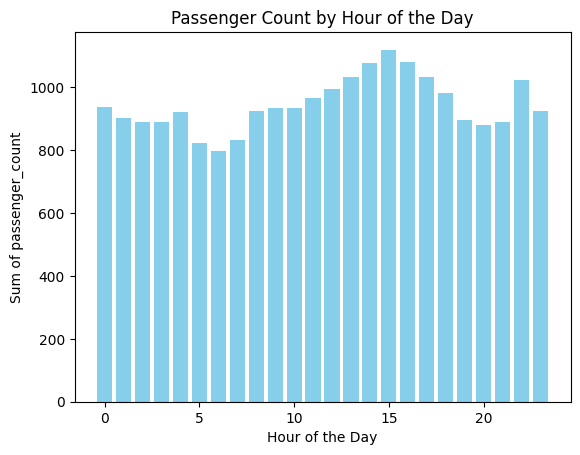

In [16]:
# Convert 'pickup_datetime' to datetime type
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

# Extract weekday and hour of the day
train['weekday'] = train['pickup_datetime'].dt.weekday
train['hour_of_day'] = train['pickup_datetime'].dt.hour

# Group by 'weekday' and sum the values
grouped_weekday = train.groupby('weekday').mean().reset_index()

# Group by 'hour_of_day' and sum the values
grouped_hour = train.groupby('hour_of_day').mean().reset_index()

# Creating a bar plot for weekday
plt.bar(grouped_weekday['weekday'], grouped_weekday['trip_duration'], color='skyblue')
plt.xlabel('Weekday')
plt.ylabel('Sum of passenger_count')
plt.title('Passenger Count by Weekday')
plt.show()

# Creating a bar plot for hour of the day
plt.bar(grouped_hour['hour_of_day'], grouped_hour['trip_duration'], color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Sum of passenger_count')
plt.title('Passenger Count by Hour of the Day')
plt.show()

O pacote holidays traz uma feature dummy que nos diz se aquela data, na cidade de noa york é feriado ou não, podendo ser importante para a previsão.

In [17]:
!pip install holidays

In [18]:
min(train['pickup_datetime'].dt.year)-max(train['pickup_datetime'].dt.year)

0

Em datas que não são feriado, as viagens possuem um tempo médio um pouco maior do que em datas de Feriado

            pickup_datetime  is_holiday
0       2016-03-14 17:24:55       False
1       2016-06-12 00:43:35       False
2       2016-01-19 11:35:24       False
3       2016-04-06 19:32:31       False
4       2016-03-26 13:30:55       False
...                     ...         ...
1458639 2016-04-08 13:31:04       False
1458640 2016-01-10 07:35:15       False
1458641 2016-04-22 06:57:41       False
1458642 2016-01-05 15:56:26       False
1458643 2016-04-05 14:44:25       False

[1458644 rows x 2 columns]


<ipython-input-19-98945e368759>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_hour = train.groupby('is_holiday').mean().reset_index()


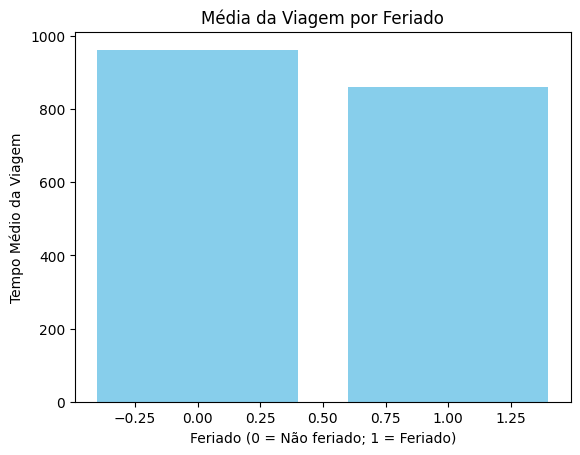

In [19]:
import holidays

# Assuming 'train' is your DataFrame

# Convert 'pickup_datetime' to datetime type
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

# Create a column to indicate if the date is a holiday
us_holidays = holidays.UnitedStates(years=2016,prov='NY')  # You can choose the country accordingly
train['is_holiday'] = train['pickup_datetime'].dt.date.apply(lambda x: x in us_holidays)

# Display the DataFrame with the new 'is_holiday' column
print(train[['pickup_datetime', 'is_holiday']])

# Group by 'hour_of_day' and sum the values
grouped_hour = train.groupby('is_holiday').mean().reset_index()

# Creating a bar plot for weekday
plt.bar(grouped_hour['is_holiday'], grouped_hour['trip_duration'], color='skyblue')
plt.xlabel('Feriado (0 = Não feriado; 1 = Feriado)')
plt.ylabel('Tempo Médio da Viagem')
plt.title('Média da Viagem por Feriado')
plt.show()


In [20]:
train['pickup_month']=train['pickup_datetime'].dt.month_name()

### Alterações no conjunto de teste

Nesta Seção as mesmas alterações aplicadas no conjunto de treinamento são aplicadas no conjunto de teste

In [21]:
# Convert 'pickup_datetime' to datetime type
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

# Create a column to indicate if the date is a holiday
us_holidays = holidays.UnitedStates(years=2016,prov='NY')  # You can choose the country accordingly
test['is_holiday'] = test['pickup_datetime'].dt.date.apply(lambda x: x in us_holidays)

# Display the DataFrame with the new 'is_holiday' column
print(test[['pickup_datetime', 'is_holiday']])


           pickup_datetime  is_holiday
0      2016-06-30 23:59:58       False
1      2016-06-30 23:59:53       False
2      2016-06-30 23:59:47       False
3      2016-06-30 23:59:41       False
4      2016-06-30 23:59:33       False
...                    ...         ...
625129 2016-01-01 00:02:52        True
625130 2016-01-01 00:01:52        True
625131 2016-01-01 00:01:24        True
625132 2016-01-01 00:00:28        True
625133 2016-01-01 00:00:22        True

[625134 rows x 2 columns]


In [22]:
# Convert 'pickup_datetime' to datetime type
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

# Extract weekday and hour of the day
test['weekday'] = test['pickup_datetime'].dt.weekday
test['hour_of_day'] = test['pickup_datetime'].dt.hour
test['pickup_month']=test['pickup_datetime'].dt.month_name()

test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,start_coord,end_coord,Haversine_dist,is_holiday,weekday,hour_of_day,pickup_month
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,"(40.73202896118164, -73.98812866210938)","(40.7566795349121, -73.99017333984375)",2.746430,False,3,23,June
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,"(40.67999267578125, -73.96420288085938)","(40.65540313720703, -73.95980834960938)",2.759243,False,3,23,June
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,"(40.73758316040039, -73.9974365234375)","(40.729522705078125, -73.9861602783203)",1.306157,False,3,23,June
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,"(40.77190017700195, -73.95606994628906)","(40.73046875, -73.98642730712889)",5.269095,False,3,23,June
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,"(40.761474609375, -73.97021484375)","(40.755889892578125, -73.96150970458984)",0.960843,False,3,23,June


In [23]:
train['vendor_id'].unique()

array([2, 1])

In [24]:
test['vendor_id'].unique()

array([1, 2])

### Variáveis Dummy

No chunk abaixo é feito o one hot encoding das variaveis de mês, hora, id do vendedor (só existem 2 ids), registro da viagem, dia da semana

In [25]:
vendor_train = pd.get_dummies(train['vendor_id'], prefix='vi', prefix_sep='_')
vendor_test = pd.get_dummies(test['vendor_id'], prefix='vi', prefix_sep='_')
store_and_fwd_flag_train = pd.get_dummies(train['store_and_fwd_flag'], prefix='sf', prefix_sep='_')
store_and_fwd_flag_test = pd.get_dummies(test['store_and_fwd_flag'], prefix='sf', prefix_sep='_')

month_train = pd.get_dummies(train['pickup_month'], prefix='m', prefix_sep='_')
month_test = pd.get_dummies(test['pickup_month'], prefix='m', prefix_sep='_')
hour_train = pd.get_dummies(train['hour_of_day'], prefix='h', prefix_sep='_')
hour_test = pd.get_dummies(test['hour_of_day'], prefix='h', prefix_sep='_')
dow_train = pd.get_dummies(train['weekday'], prefix='dow', prefix_sep='_')
dow_test = pd.get_dummies(test['weekday'], prefix='dow', prefix_sep='_')

In [26]:
vendor_train


,vi_1,vi_2
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
1458639,0,1
1458640,1,0
1458641,0,1
1458642,1,0


In [27]:
train = train.drop(['id','vendor_id','store_and_fwd_flag','dropoff_datetime','pickup_datetime',
                   'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','start_coord','end_coord','pickup_month','weekday','hour_of_day'],axis = 1)
Test_id = test['id']
test = test.drop(['id','vendor_id','store_and_fwd_flag','pickup_datetime',
                   'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','start_coord','end_coord','pickup_month','weekday','hour_of_day'], axis = 1)


No chunk abaixo, temos o dataset que será utilizado para ajuste do modelo

In [28]:
train

,passenger_count,trip_duration,Haversine_dist,is_holiday
0,1,455,1.498523,False
1,1,663,1.805510,False
2,1,2124,6.385107,False
3,1,429,1.485500,False
4,1,435,1.188590,False
...,...,...,...,...
1458639,4,778,1.225082,False
1458640,1,655,6.049844,False
1458641,1,764,7.824617,False
1458642,1,373,1.092565,False


In [29]:
Train_Master = pd.concat([train,
                          vendor_train,
                          store_and_fwd_flag_train,
                         month_train,
                          hour_train,
                          dow_train
                         ], axis=1)

Test_Master = pd.concat([test,
                          vendor_test,
                          store_and_fwd_flag_test,
                         month_test,
                          hour_test,
                          dow_test
                         ], axis=1)

# Modelos

O primeiro modelo de Machine Learning a ser utilizado é o XGBoost (mais detalhes: https://www.datageeks.com.br/xgboost/), sumarizando, o XGBoost é um poderoso algoritmo de aprendizado de máquina que se destaca em classificação, regressão e ranking. Ele utiliza o conceito de boosting, combinando várias árvores de decisão de forma sequencial para criar um modelo robusto. Principais características:

- **Gradient Boosting:** Otimiza a função de perda utilizando o gradiente em relação à previsão.
- **Regularização:** Controla a complexidade do modelo para evitar overfitting.
- **Função de Perda Personalizável:** Permite adaptação a diferentes tipos de problemas.
- **Árvores de Decisão Profundas:** Base do modelo, corrigindo erros das árvores anteriores.
- **Eficiência e Escalabilidade:** Paralelização em várias etapas do treinamento para lidar com grandes conjuntos de dados.
- **Suporte a Diferentes Tipos de Dados:** Numéricos e categóricos.
- **Importância de Recursos:** Fornece pontuações indicando a contribuição de cada recurso.

O XGBoost é amplamente utilizado, especialmente em competições de ciência de dados, devido à sua eficácia e velocidade.

Foi tomado o Log da duração da viagem para previsão e cálculo da métrica utilizada, que foi o RMSE (para comparação de modelos)

O conjunto de treinamento é subdividido entre treinamento e validação, para verificar a métrica do modelo tanto no conjunto de treinamento quanto na validação, para que a revisão possa ser extrapolada para o conjunto de teste, pois este nao possui o equivalente a variável **trip_duration**

In [30]:
from sklearn.model_selection import train_test_split
Train, Validation = train_test_split(Train_Master, test_size = 0.2)

X_train = Train.drop(['trip_duration'], axis=1)
Y_train = np.log(Train["trip_duration"])
X_test = Validation.drop(['trip_duration'], axis=1)
Y_test = np.log(Validation["trip_duration"])

Y_test = Y_test.reset_index().drop('index',axis = 1)
Y_train = Y_train.reset_index().drop('index',axis = 1)

Aqui a variável feriado é transformada em inteiro, para ficar com o valor 1 quando a flag for True e 0 quando for False

In [31]:
X_train['is_holiday']=X_train['is_holiday'].astype(int)
X_test['is_holiday']=X_train['is_holiday'].astype(int)
Test_Master['is_holiday']=Test_Master['is_holiday'].astype(int)

In [32]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge,BayesianRidge
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import mean_squared_error

dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)
dtest = xgb.DMatrix(Test_Master)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

Este trecho de código está relacionado ao treinamento de um modelo de Regressão Linear com o algoritmo XGBoost (Extreme Gradient Boosting):

1. **Parâmetros do XGBoost (`xgb_pars`):**
   - `min_child_weight`: Peso mínimo que um nó filho deve ter. Isso ajuda a evitar particionamento excessivamente agressivo.
   - `eta`: Taxa de aprendizado, controla o tamanho do passo durante a atualização dos pesos.
   - `colsample_bytree`: Fração de características a serem consideradas em cada árvore.
   - `max_depth`: Profundidade máxima de cada árvore no modelo.
   - `subsample`: Fração de instâncias de treinamento a serem usadas para treinar cada árvore.
   - `lambda`: Parâmetro de regularização L2 (Ridge).
   - `nthread`: Número de threads a serem usadas para rodar o XGBoost. `-1` significa usar todos os núcleos disponíveis.
   - `booster`: Tipo de modelo a ser treinado, neste caso, `'gbtree'`, indicando árvores de decisão.
   - `silent`: Se deve ou não imprimir mensagens durante o treinamento.
   - `eval_metric`: Métrica usada para avaliação do modelo durante o treinamento, neste caso, o erro quadrático médio (`'rmse'`).
   - `objective`: Objetivo do treinamento, neste caso, `'reg:linear'`, indicando uma regressão linear.

2. **Treinamento do Modelo (`xgb.train`):**
   - `xgb.train`: Função para treinar um modelo XGBoost.
   - `xgb_pars`: Dicionário contendo os parâmetros do modelo.
   - `dtrain`: Conjunto de dados de treinamento.
   - `10`: Número de iterações (ou árvores) a serem treinadas.
   - `watchlist`: Lista de conjuntos de dados usados para monitorar o desempenho do modelo durante o treinamento.
   - `early_stopping_rounds=2`: Se o desempenho não melhorar após 2 iterações, interrompa o treinamento.
   - `maximize=False`: Indica que a métrica de avaliação (`'rmse'`) deve ser minimizada.
   - `verbose_eval=1`: Controla a quantidade de informações impressas durante o treinamento.

Em resumo, este código configura e treina um modelo de Regressão Linear utilizando o algoritmo XGBoost, monitorando o desempenho do modelo com a métrica RMSE e interrompendo o treinamento se não houver melhoria após duas iterações. O resultado final, a menor RMSE alcançada durante o treinamento, é impresso.

https://xgboost.readthedocs.io/en/stable/


In [33]:
xgb_pars = {'min_child_weight': 1, 'eta': 0.5, 'colsample_bytree': 0.9,
            'max_depth': 6,
'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
'eval_metric': 'rmse', 'objective': 'reg:linear'}
model = xgb.train(xgb_pars, dtrain, 10, watchlist, early_stopping_rounds=2,
      maximize=False, verbose_eval=1)
print('Modeling RMSE %.5f' % model.best_score)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:01:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:01:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:0.58909	valid-rmse:0.59123
[1]	train-rmse:0.58528	valid-rmse:0.59195
[2]	train-rmse:0.51606	valid-rmse:0.52439
[3]	train-rmse:0.49520	valid-rmse:0.50410
[4]	train-rmse:0.48756	valid-rmse:0.49708
[5]	train-rmse:0.48360	valid-rmse:0.49371
[6]	train-rmse:0.48070	valid-rmse:0.49078
[7]	train-rmse:0.47843	valid-rmse:0.48850
[8]	train-rmse:0.47642	valid-rmse:0.48644
[9]	train-rmse:0.47439	valid-rmse:0.48449
Modeling RMSE 0.48449


O gráfico de feature importance mostra que algumas das features que mais contribuíram para previsão foram a distância Haversine (já era esperado, por ser a distância em km entre o ponto de origem e o ponto de destino), dow_6 (ou seja se o dia da semana é uma sexta-feira) e a quantidade de passageiros na viagem (talvez viagens com mais passageiros tenham uma tendência a serem mais longas)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

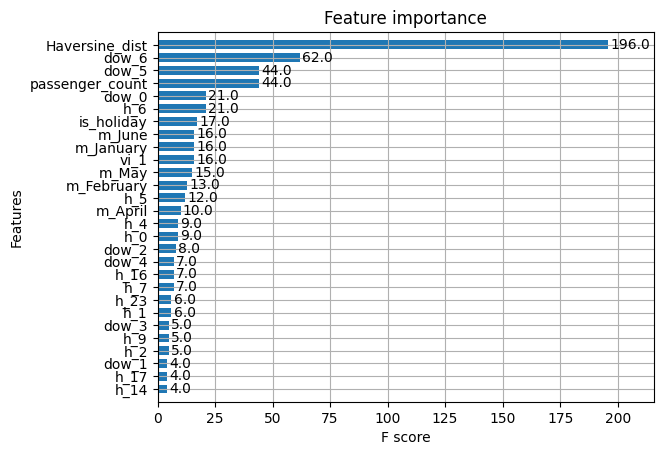

In [34]:
xgb.plot_importance(model, max_num_features=28, height=0.7)


In [35]:
pred = model.predict(dtest)
pred = np.exp(pred)# - 1
submission = pd.concat([Test_id, pd.DataFrame(pred)], axis=1)
submission.columns = ['id','trip_duration']
submission['trip_duration'] = submission.apply(lambda x : 1 if (x['trip_duration'] <= 0) else x['trip_duration'], axis = 1)


A previsão no conjunto de teste, com o modelo ajustado, está na tabela abaixo:

In [36]:
submission

,id,trip_duration
0,id3004672,720.959290
1,id3505355,720.959290
2,id1217141,397.997772
3,id2150126,1182.069214
4,id1598245,307.640930
...,...,...
625129,id3008929,282.893494
625130,id3700764,1132.939941
625131,id2568735,1263.149658
625132,id1384355,2085.194092


# Random Forest Regressor

O Random Forest Regressor é um algoritmo de aprendizado de máquina baseado em ensemble learning, especialmente adequado para problemas de regressão. Aqui está uma sumarização mais concisa:

- **Ensemble Learning para Regressão:**
  - Combina várias árvores de decisão para melhorar a precisão das previsões numéricas.

- **Árvores de Decisão Aleatórias:**
  - Cada árvore é treinada em uma amostra aleatória do conjunto de dados, introduzindo diversidade.

- **Amostragem Bootstrap:**
  - Utiliza amostragem com reposição para criar conjuntos de treinamento diferentes para cada árvore.

- **Votação por Média:**
  - A previsão final é a média das previsões de todas as árvores, proporcionando uma estimativa robusta.

- **Parâmetros Ajustáveis:**
  - Permite ajustar parâmetros como o número de árvores, a profundidade máxima e o número mínimo de amostras para dividir um nó.

- **Importância de Recursos:**
  - Fornece uma pontuação de importância para cada característica, indicando sua contribuição para as previsões.

- **Robustez a Overfitting:**
  - Menos propenso a overfitting devido à diversidade introduzida pelas árvores e à amostragem aleatória.

- **Flexibilidade e Desempenho:**
  - Eficaz para uma variedade de conjuntos de dados, exigindo menos ajuste de hiperparâmetros.

- **Implementação Eficiente:**
  - Implementações eficientes disponíveis em bibliotecas populares como scikit-learn.

Em resumo, o Random Forest Regressor é uma escolha versátil e eficaz para problemas de regressão, aproveitando a força do ensemble learning e a aleatoriedade para melhorar o desempenho e a robustez do modelo.

https://towardsdatascience.com/random-forest-regression-5f605132d19d

Abaixo a variável **trip_duration** é transformada com base em seu logarítimo:

In [37]:
X_train = Train.drop(['trip_duration'], axis=1)
Y_train = np.log(Train["trip_duration"])
X_test = Validation.drop(['trip_duration'], axis=1)
Y_test = np.log(Validation["trip_duration"])

Y_test = Y_test.reset_index().drop('index',axis = 1)
Y_train = Y_train.reset_index().drop('index',axis = 1)

n_estimators=10: Define o número de árvores na floresta para 10. Este é um parâmetro crucial que afeta o desempenho do modelo. O RMSE final do modelo foi de 0.51, obtendo portanto uma performance pior que o modelo XGBoost neste Dataset.

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, (Y_train.values.ravel()))
print(np.sqrt(mean_squared_error(Y_test, rf.predict(X_test))))

0.5172983325744629


In [39]:
importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_], axis=0)

O gráfico de Feature Importances mostra que a distância de haversine também foi a feature mais relevante na previsão, sendo que as outras tiveram pouca contribuição na previsão.

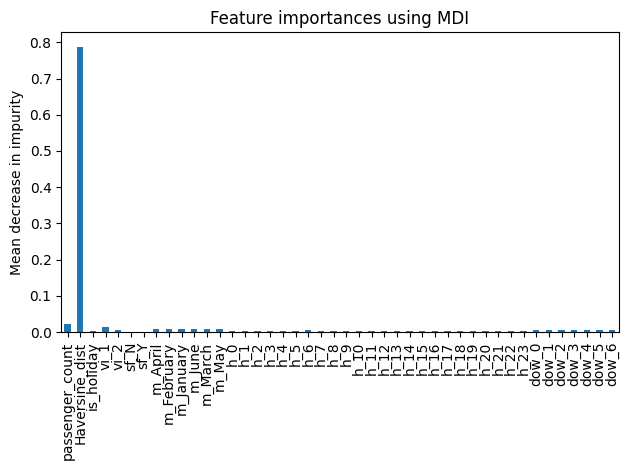

In [40]:
forest_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [41]:
pred = np.exp(rf.predict(Test_Master))
submission2 = pd.concat([Test_id, pd.DataFrame(pred)], axis=1)
submission2.columns = ['id','trip_duration']
submission2['trip_duration'] = submission2.apply(lambda x : 1 if (x['trip_duration'] <= 0) else x['trip_duration'], axis = 1)
submission2

,id,trip_duration
0,id3004672,560.917513
1,id3505355,712.783332
2,id1217141,753.094082
3,id2150126,1009.689678
4,id1598245,258.586608
...,...,...
625129,id3008929,226.616622
625130,id3700764,1191.368227
625131,id2568735,1308.879882
625132,id1384355,1555.425542


# Abordagem Deep

O modelo Deep escolhido foi uma rede neural feedforward, primeiramente as features foram normalizadas (manteve-se a escala logarítimica da variável **trip_duration**).

Uma Feedforward Neural Network é um modelo de rede neural onde a informação move-se em uma única direção, da entrada para a saída. Neurônios nas camadas ocultas aplicam funções de ativação às suas entradas ponderadas. Essas redes são usadas para tarefas como classificação e regressão, sendo treinadas para minimizar a diferença entre suas previsões e os rótulos reais por meio de algoritmos como o *backpropagation*.

https://deepai.org/machine-learning-glossary-and-terms/feed-forward-neural-network

In [42]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming X_train, Y_train, X_test, Y_test are already defined

# Feature scaling (normalize the input data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled


array([[-0.50551189, -0.25614942, -0.15969167, ..., -0.42508081,
        -0.42214422, -0.39342742],
       [-0.50551189, -0.59146339, -0.15969167, ..., -0.42508081,
        -0.42214422, -0.39342742],
       [-0.50551189,  1.52747954, -0.15969167, ..., -0.42508081,
        -0.42214422, -0.39342742],
       ...,
       [-0.50551189, -0.26576202, -0.15969167, ..., -0.42508081,
         2.36885866, -0.39342742],
       [ 1.01803561,  1.59833712, -0.15969167, ..., -0.42508081,
        -0.42214422, -0.39342742],
       [-0.50551189,  0.73816955, -0.15969167, ..., -0.42508081,
        -0.42214422, -0.39342742]])

Na rede neural abaixo, a função de ativação linear é utilizada na camada de saída, além disso o otimizador Adam é utilizado devido à sua eficiência e capacidade de adaptar automaticamente a taxa de aprendizado durante o treinamento

In [43]:

# Define the neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # Linear activation for regression

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, Y_train, epochs=10, batch_size=64, validation_data=(X_test_scaled, Y_test))

# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, Y_test)
print(f'Mean Squared Error on Test Set: {loss}')

# Make predictions
predictions = model.predict(X_test_scaled)

# If needed, convert the predictions back to original scale (inverse log transformation)
predicted_trip_duration = np.exp(predictions)

# You can now use 'predicted_trip_duration' for further analysis or evaluation


Epoch 1/10
18234/18234 [==============================] - 47s 3ms/step - loss: 0.3876 - val_loss: 0.2608
Epoch 2/10
18234/18234 [==============================] - 40s 2ms/step - loss: 0.2429 - val_loss: 0.2412
Epoch 3/10
18234/18234 [==============================] - 48s 3ms/step - loss: 0.2359 - val_loss: 0.2350
Epoch 4/10
18234/18234 [==============================] - 40s 2ms/step - loss: 0.2365 - val_loss: 0.2359
Epoch 5/10
18234/18234 [==============================] - 42s 2ms/step - loss: 0.2325 - val_loss: 0.2315
Epoch 6/10
18234/18234 [==============================] - 46s 2ms/step - loss: 0.2369 - val_loss: 0.2351
Epoch 7/10
18234/18234 [==============================] - 45s 2ms/step - loss: 0.2318 - val_loss: 0.2341
Epoch 8/10
18234/18234 [==============================] - 43s 2ms/step - loss: 0.2311 - val_loss: 0.2326
Epoch 9/10
18234/18234 [==============================] - 45s 2ms/step - loss: 0.2306 - val_loss: 0.2315
Epoch 10/10
9117/9117 [==============================] 

com um RMSE de 0.479 esse modelo foi o que teve a menor métrica e erro em comparação ao XGBoost e a Random Regression Tree, portanto em questõe de performance faz sentido utilizá-lo, agora em questões de performance computacional o XGBoost é o modelo mais em conta devido a seu rápido treinamento e ajuste.

In [44]:
print(np.sqrt(mean_squared_error(Y_test, np.log(predicted_trip_duration))))

0.4799336261667659


In [45]:
# Make predictions
predictions = model.predict(X_test_scaled)

# If needed, convert the predictions back to original scale (inverse log transformation)
predicted_trip_duration = np.exp(predictions)

9117/9117 [==============================] - 13s 1ms/step


In [46]:
scaler = StandardScaler()
X_testmaster_scaled = scaler.fit_transform(Test_Master)

# Make predictions
predictions = model.predict(X_testmaster_scaled)

# If needed, convert the predictions back to original scale (inverse log transformation)
predicted_trip_duration = np.exp(predictions)

predicted_trip_duration

19536/19536 [==============================] - 30s 2ms/step


array([[ 686.1593],
       [ 689.2305],
       [ 390.699 ],
       ...,
       [1362.2607],
       [1820.9307],
       [1133.9274]], dtype=float32)

In [47]:
submission3 = pd.concat([Test_id, pd.DataFrame(predicted_trip_duration)], axis=1)
submission3.columns = ['id','trip_duration']
submission3['trip_duration'] = submission3.apply(lambda x : 1 if (x['trip_duration'] <= 0) else x['trip_duration'], axis = 1)
submission3

,id,trip_duration
0,id3004672,686.159302
1,id3505355,689.230530
2,id1217141,390.699005
3,id2150126,1216.265503
4,id1598245,292.941406
...,...,...
625129,id3008929,258.162659
625130,id3700764,1128.162109
625131,id2568735,1362.260742
625132,id1384355,1820.930664


Como a rede neural é um modelo caixa preta, faz sentido utilizar um método de XAI específico de modelos agnósticos como o SHAP, para conseguir explicabilidade e ter mais transparência sobre as previsões do modelo ajustado.

https://bixtecnologia.com.br/como-eu-gostaria-que-alguem-me-explicasse-shap-values/

In [48]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.6 MB/s eta 0:00:00


Para o cálculo dos valores SHAP foi utilizado o Kernel Explainer (O Kernel SHAP é um método que utiliza uma regressão linear ponderada especial para calcular a importância de cada característica. Os valores de importância calculados são os valores de Shapley da teoria dos jogos e também são coeficientes de uma regressão linear local.) e posteriormente feito o gráfico de feature importance, no gráfico assim como verificado nos algoritmos anteriores, a variável Haversine_dist é bastante importante para a previsão do modelo.

Além disso é interessante que os horários tambem tenham tido uma relevância considerável para previsão, podendo indicar que esses horários talvez sejam de maior ou menor fluxo de carros na cidade e por isso possuem características afetam a previsão.

https://shap-lrjball.readthedocs.io/en/latest/generated/shap.KernelExplainer.html

16/16 [==============================] - 0s 2ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1563/1563 [==============================] - 2s 2ms/step


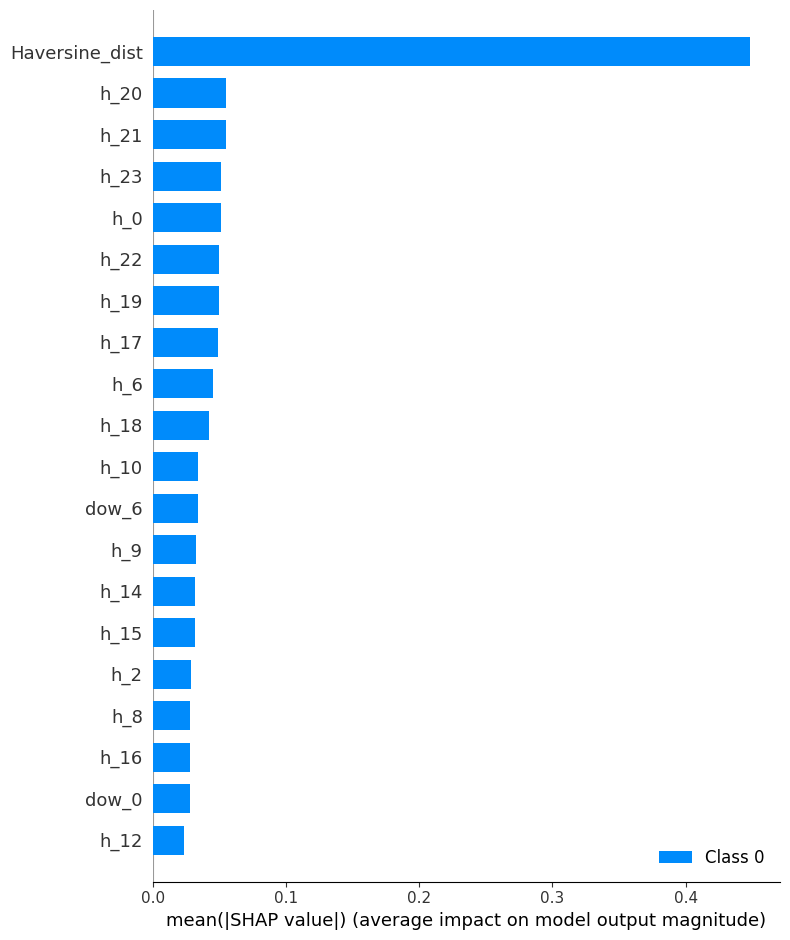

In [49]:
import shap

# Assuming 'model' is your trained neural network model
# Assuming 'X_test_scaled' is your scaled test data

explainer = shap.KernelExplainer(model.predict,shap.sample(X_train_scaled,500))

shap_values = explainer.shap_values(shap.sample(X_test_scaled,100),nsamples=100)

# Summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns)


**Em todos os métodos de explicabilidade**, a feature mais importante para a previsão foi a haversine_dist, que é a distância em km aproximada da latitude e longitude de origem até a latitude e longitude de destino, ou seja a distância em km da origem até o destino contribui para a previsão do tempo de viagem dos taxis.

O BeeSwarm Plot (https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/beeswarm.html), o gráfico mostra que enquanto os horários geralmente tem um impacto negativo sobre a previsão do modelo (ou seja podem diminuir a previsão do tempo de duração da viagem - trip_duration) valores altos da distância de Haversine tendem a gerar previsões com valores mais altos de duração do tempo de viagem (assim como valores mais baixos tendem a gerar previsões com tempos de viagem menores).

In [50]:
explainer = shap.Explainer(model,X_train_scaled,feature_names=X_test.columns)

sv = explainer(shap.sample(X_test_scaled,100))
# Summary plot , feature_names=X_test.columns



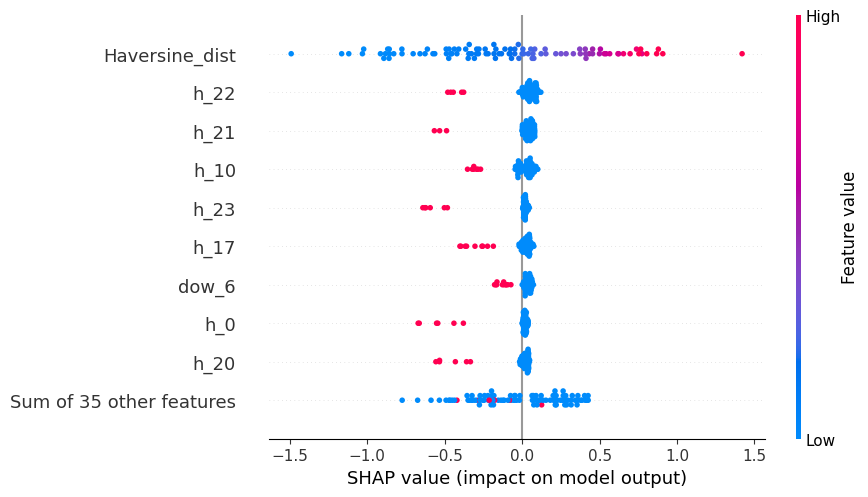

In [51]:
shap.plots.beeswarm(sv)